## Load package and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib
matplotlib.rcParams["figure.figsize"] = (8,6)

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('gdrive/My Drive/ML/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Feature Selection

In [ ]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [ ]:
df.shape

(891, 5)

## 3. Data Cleaning

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [ ]:
# df1 = df.dropna()
df.Age = df.Age.fillna(inputs.Age.mean())
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

## 4. Feature Engineering

In [ ]:
# df['Sex_n'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 2)
df.Sex = df.Sex.map({'male': 1, 'female': 2})
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,2,38.0,71.2833
2,1,3,2,26.0,7.9250
3,1,1,2,35.0,53.1000
4,0,3,1,35.0,8.0500


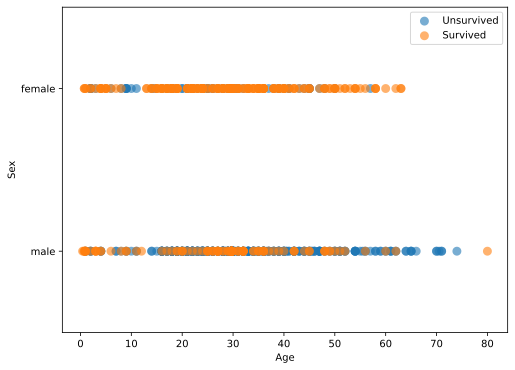

In [ ]:
df0 = df[df['Survived'] == 0]
plt.scatter(df0['Age'],df0['Sex'],
            alpha=0.6,
            s=80, lw=0, cmap='RdYlGn')
df1 = df[df['Survived'] == 1]
plt.scatter(df1['Age'],df1['Sex'],
            alpha=0.6,
            s=80, lw=0, cmap='RdYlGn')
plt.xlabel('Age')
plt.ylabel('Sex')
plt.ylim(0.5, 2.5)
plt.yticks([1, 2],
       [r'male', r'female'])
plt.legend(("Unsurvived","Survived"),loc="best")

## Building Model

In [ ]:
inputs_n = df.drop(['Sex','Survived'], axis='columns')
inputs_n.head()

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500


In [ ]:
target = df['Survived']
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.2)

In [ ]:
len(X_train)

712

In [ ]:
len(X_test)

179

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# scores
model.score(X_test, y_test)

0.6368715083798883